In [14]:
import scipy.io
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
%matplotlib inline

mat = scipy.io.loadmat("mnist_all.mat")
sigmoid = lambda x: 1/(1 + np.exp(-x))

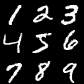

In [15]:
collage = im.new("L",(28*3,28*3))
for i in range(9):
    collage.paste(im.fromarray(np.array(mat.get(f'train{i+1}'))[0].reshape((28,28))),(28 * (i%3),28 * (i//3)))
display(collage)
# we have that each training set contains a 784 long vector that represents a handwritten digit
# the digit in the name of the training set corrosponds to the image in the figure

The number of mistakes made:  16
The success rate of the final weights: 99.87%


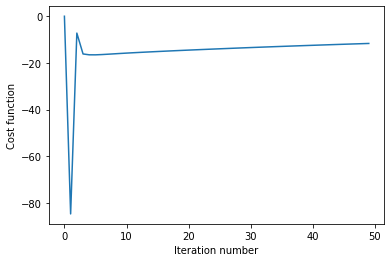

In [22]:
train1 = mat.get("train1")
train2 = mat.get("train2")
# training sets for 1 and 2 figures

size1 = train1.shape[0]
size2 = train2.shape[0]
# sizes of respective training sets

test1 = mat.get("test1")
test2 = mat.get("test2")
# test sets for both figures

# 784 cause this is the straightened form of the 28x28 pictures
size = train1.shape[1]

w = np.ones(size)*0.0005  # creating a uniform weights vector
# creating a small number devided by the size of the data cause it is out of the sum
Tau = 0.0001/(size1+size2)

epochCount = 50

costFunction = np.zeros(epochCount)
for i in range(0, epochCount):
    wXt = np.matmul(train1, w)  # calculate weights times the feature vectors
    SigZero = sigmoid(wXt)  # passing the activation sigmoid function over the calcuation
    costFD = np.matmul((0 - SigZero), train1) # computing the derivetive of the cost function

    wXt = np.matmul(train2, w)  
    SigOne = sigmoid(wXt)
    costFD += np.matmul((1 - SigOne), train2) # doing the same thing for the training set of 2 figures

    w = w + Tau * costFD # doing an iteration on the weights
    costFunction[i] = (np.sum(np.log(SigOne)) + np.sum(np.log(SigZero))) / (size1 + size2) # saving the preformance of the this iteration

wXt = np.matmul(test1,w)
SigZero = sigmoid(wXt) 
errors0 = sum(SigZero >= 0.5)

wXt = np.matmul(test2,w)
SigOne = sigmoid(wXt)
errors1 = sum(SigOne <= 0.5)

Mistakes = errors0 + errors1 
print("The number of mistakes made: ",Mistakes)
SuccessRate = (1-(Mistakes/(size1+size2)))*100 
print(f"The success rate of the final weights: {round(SuccessRate,2)}%")

fig = plt.figure()
fig.set_facecolor("white")
plt.plot(costFunction)
plt.xlabel('Iteration number')
plt.ylabel('Cost function')

plt.show()
